In [2]:
# Regular EDA and plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
#matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.shape

(299, 13)

In [11]:
df.tail(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
289  90.0        1                       337         0                 38   
290  45.0        0                       615         1                 55   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
289                    0   390000.0               0.9           144    0   
290                    0   222000.0               0.8           141    0   
291                    0   133000.0               1.4           139    1   
292                    0   382000.0               1.0           140    1   
293                    0   179000.0               0.9           136    1   
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
289        0   256            0  
290        0   257            0  
291        0   258            0  
292        1   258            0  
293        1   270            0  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [5]:
# Let's see how many positive (1) and negative (0) samples we havei n our dataframe
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [23]:
# Checking the value counts in percentage
print('DEATH_EVENT" column value count in percentage\n', df['DEATH_EVENT'].value_counts(normalize=True)*100)

DEATH_EVENT" column value count in percentage
 0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64


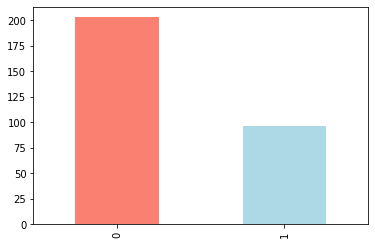

In [22]:
# Plotting the value counts with a bar graph
df.DEATH_EVENT.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [26]:
# Getting quick insights on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [28]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [29]:
# Comparaing independent variables to have an idea of how they impact the target variable 'DEATH_EVENT' 
corr_matrix = df.corr()
corr_matrix


age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

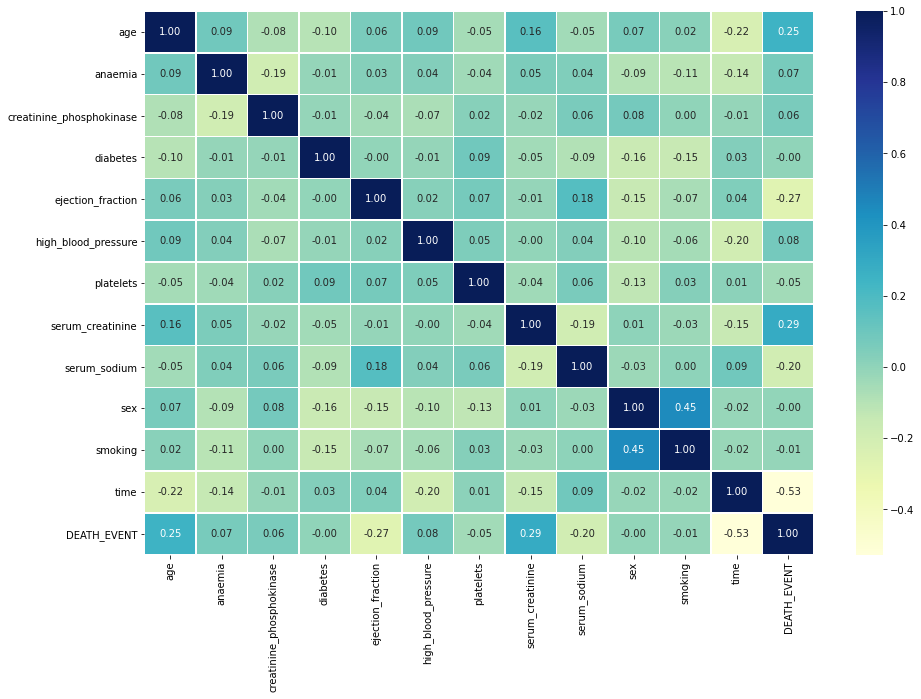

In [28]:
# Plotting the correlation between independent variable
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt='.2f',
           cmap='YlGnBu');

From the above correlation plot, 'age', 'serum_creatinine', 'high_blood_pressure' and 'high_blood_pressure' greatly impact our target variable 'DEATH_EVENT'

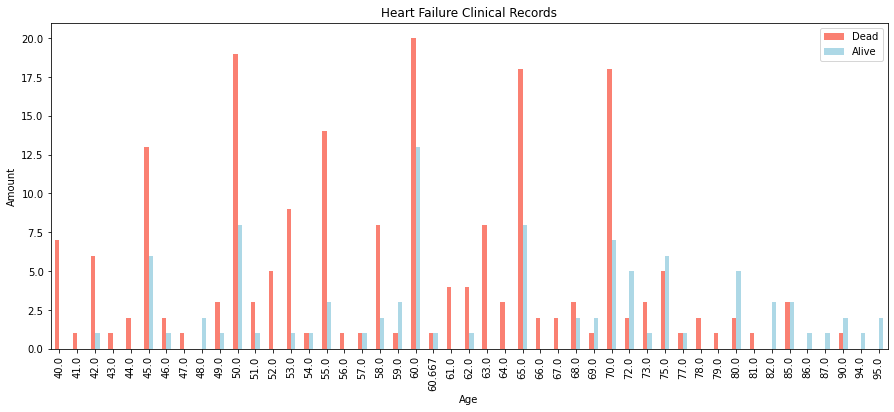

In [41]:
# Comparing independent variables with high impact using plot
pd.crosstab(df.age, df.DEATH_EVENT).plot(kind='bar',
                                         figsize=(15,6),
                                         color=['salmon','lightblue'])

plt.title('Heart Failure Clinical Records')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend(['Dead', 'Alive']);

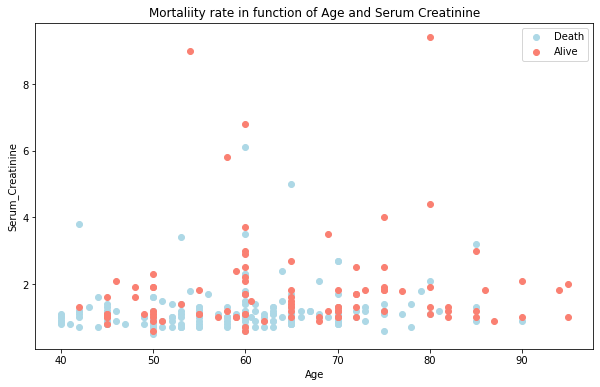

In [43]:
# plotting mortality rate using independent variables of Age and Serum_Creatinine
plt.figure(figsize=(10,6))

# Positive mortaliity rate
plt.scatter(df.age[df.DEATH_EVENT==0],
            df.serum_creatinine[df.DEATH_EVENT==0],
            c='lightblue')

#Negative mortality rate
plt.scatter(df.age[df.DEATH_EVENT==1],
            df.serum_creatinine[df.DEATH_EVENT==1],
            c='salmon')

plt.title('Mortaliity rate in function of Age and Serum Creatinine')
plt.xlabel('Age')
plt.ylabel('Serum_Creatinine')
plt.legend(['Death', 'Alive']);

What ot Infer from this?
- Patients ranging from 65years of age has a high mortality rage no matter the quantity of Serum Creatinine in their body
- Patients with high quantity with Serum creatinine has a higher mortaliity rate

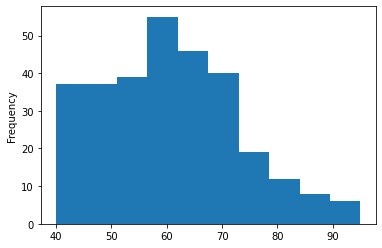

In [59]:
# Checking the graph distribution of age and Serum Creatinine
df.age.plot.hist();

In [29]:
# Creating my features and target variables (x and y)
# Everything except target variable ('DEATH_EVENT')
x = df.drop('DEATH_EVENT', axis=1)

# Target variable
y = df['DEATH_EVENT']

In [32]:
# Random seed for reproducibility
np.random.seed(23)

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


Will be fitting models with 
- LogisticRegression()
- KNeighborsClassifier()
- RandomForestClassifier()
And comparing results

In [30]:
# Putting models in a dictionary
models = {'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit=learn machine learning models
    x_train: training data
    x_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    # Random seed for reproducible result
    np.random.seed(23)
    # Make a list ot keep model scores
    model_scores ={}
    # Loop through models
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

{'KNN': 0.6666666666666666,
 'Logistic Regression': 0.7833333333333333,
 'Random Forest': 0.7833333333333333}

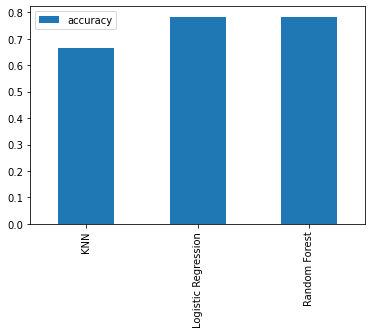

In [35]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [36]:
# Tuning KNeighbors Classifier Paramter for optimal results

# Creating a list of train scores
train_scores=[]

# Creating a list of test scores
test_scores = []

# Creating a list of different values for n_neighbors
neighbors = range(1,21)

# Setup Algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors value
for i in neighbors:
    knn.set_params(n_neighbors=1)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test scores
    test_scores.append(knn.score(x_test, y_test))

In [37]:
test_scores

[0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667,
 0.5166666666666667]

Maximum KNN score on the test date:  51.66666666666667


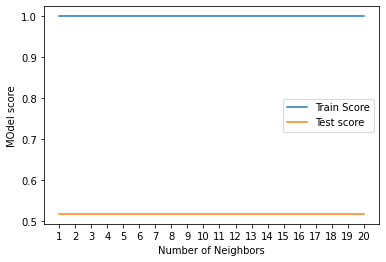

In [79]:
# Plotting KNN to better understand if its worth pursuing.

plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('MOdel score')
plt.legend()
print('Maximum KNN score on the test date: ', max(test_scores)*100)

We will be abandoning the KNeighborsClassifier model as the score remains poorest among the selected models

## We will use RandomizedSearchCV to build on the LogisticRegressor and RandomForestClassifier models Next

In [38]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}

# Different Randomforestclassifier hyperparameters
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [41]:
## We will let RandomizedSearchCV try 20 different combinations of hyperparameters
np.random.seed(23)

# Setting up random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [43]:
# New LogisticRegression score after RandomSearchCV tuning
rs_log_reg.score(x_test, y_test)

0.8166666666666667

### RandomForestClassifier RandomSearchCV tuning

In [45]:
np.random.seed(42)
# setup random hyperparameter search for RandomForestClassifer
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [46]:
# Finding the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [48]:
# Evaluate te randomized search random forest model
rs_rf.score(x_test, y_test)

0.7666666666666667

### The above score shows us RandomSearchCV improved score for LogistricRegression but had no effect on RandomForestClassifier

# Doing more Tuning with GridSearchCV on LogisticRegression and RandomForestClassifier

In [49]:
# Different LogisticRegression Hyperparameters
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
# check the best parameter
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [53]:
# Evaluate Model
gs_log_reg.score(x_test, y_test)

0.8166666666666667

## THE ABOVE SCORE IS THE BEST WE COULD GET SO FAR FROM LOGISTICREGRESSION = 0.82

## Let's make our predictions

In [54]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [55]:
#compare to the original y_test
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

## WE WILL RUN SEVERAL METRICS ON THE PREDICTIONS MADE

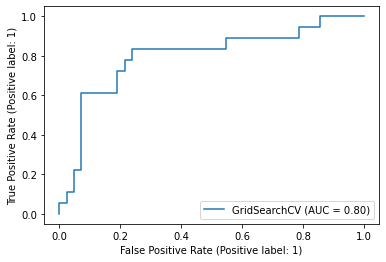

In [56]:
# ROC CURVES AND AUC SCORES
# We will be using the GridSearchCV version of our LogistricRegression estimator. gs_log_reg

# import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);

In [57]:
# Displaying confusion matrix
print(confusion_matrix(y_test, y_preds))

[[39  3]
 [ 8 10]]


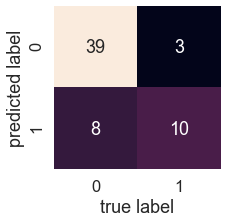

In [58]:
# Importing Seaborn for a better presentation
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plotting a confusion matrix using seaborn's heatmap().
    
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
plot_conf_mat(y_test, y_preds)

### The above heatmap shows us we have 3 False Positives and 8 False Negatives

In [84]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.77      0.56      0.65        18

    accuracy                           0.82        60
   macro avg       0.80      0.74      0.76        60
weighted avg       0.81      0.82      0.81        60



### We've gotten deeper insights on our model.These were all calculated using a single training and test model. 
### We will take the best model along with the best hyperparameters and use Cross_val_score() along with the scoring parameter values

In [60]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [66]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiating the best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.0001,
                         solver='liblinear')

In [67]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.35      , 0.96666667, 0.86666667, 0.71666667, 0.6779661 ])

In [68]:
# Since there are 5 metrics here, we'll take the average
cv_acc = np.mean(cv_acc)
cv_acc

0.7155932203389831

### Now doing the same for other classification metrics.

In [79]:
# Cross-validated precision score
cv_precision = cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring='precision')
cv_precision

C:\Users\Emeka\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.33898305, 0.9047619 , 1.        , 1.        , 0.        ])

In [80]:
 cv_precision= np.mean(cv_precision)
cv_precision

0.6487489911218725

In [82]:
# Cross-valideated recall score
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring='recall')
cv_recall

array([1.        , 1.        , 0.57894737, 0.10526316, 0.        ])

In [83]:
cv_recall = np.mean(cv_recall)
cv_recall

0.5368421052631579

In [85]:
# Cross-validated F1 Score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring='f1'))
cv_f1

0.47602772754671496

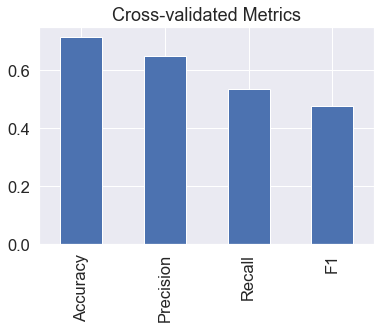

In [87]:
# Visualizing all cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_precision,
                           'Recall': cv_recall,
                           'F1':cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title='Cross-validated Metrics', legend=False);

In [88]:
clf.fit(x_train, y_train);

In [89]:
# We will use the coef_ attribute to calculate the Feature importance.
clf.coef_

array([[ 1.53682906e-02,  1.51942305e-04,  2.34897461e-04,
         2.28389380e-04, -1.98725580e-02, -5.20369905e-05,
        -5.02352311e-07,  1.82948470e-03,  7.55800386e-03,
        -1.71316134e-04, -2.95499730e-04, -1.79378677e-02]])

In [147]:
# We will match the features to the columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.020777379421578108,
 'anaemia': 0.0002021058537639448,
 'creatinine_phosphokinase': 0.00024649125148866463,
 'diabetes': 0.0003191330304709672,
 'ejection_fraction': -0.02868869748738041,
 'high_blood_pressure': -8.676044108036154e-05,
 'platelets': -6.150108605864911e-07,
 'serum_creatinine': 0.00255589527907132,
 'serum_sodium': 0.009140046859742753,
 'sex': -0.00024986764257347406,
 'smoking': -0.00042437327829268737,
 'time': -0.019985040608447892}

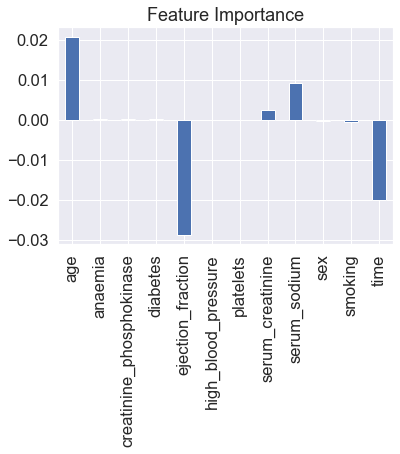

In [149]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);

## THE FEATURE IMPORTANCE PLOT ABOVE SHOWS ('AGE', 'SERUM_SODIUM' AND 'SERUM_CREATININE') HAVE POSITIVE IMPACTS ON THE TARGET PREDICTION